In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif

In [3]:
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import auc, roc_curve

In [4]:
# Import and view dataset
transaction_data = pd.read_csv('preprocessed_transaction_data.csv')
print(transaction_data.head())

   step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0    11  427818.23       198219.0            0.00            0.00   
1    20   80828.54            0.0            0.00      5149991.49   
2    20  106069.89       301258.0       195188.11       263816.83   
3    18  402832.90        11665.0            0.00        28550.98   
4    22   34643.49            0.0            0.00       346081.41   

   newbalanceDest  isFraud  type_TRANSFER  origBalanceDiscrepancy  \
0       427818.23        0              0               229599.23   
1      5230820.04        0              0                80828.54   
2       369886.72        0              1                    0.00   
3       431383.87        0              0               391167.90   
4       380724.90        0              0                34643.49   

   destBalanceDiscrepancy  
0            0.000000e+00  
1           -1.000000e-02  
2            5.820766e-11  
3            1.000000e-02  
4           -5.820766e-11  


In [5]:
print(transaction_data['isFraud'].value_counts())

0    80498
1     7500
Name: isFraud, dtype: int64


0    80498
1     7500
Name: isFraud, dtype: int64


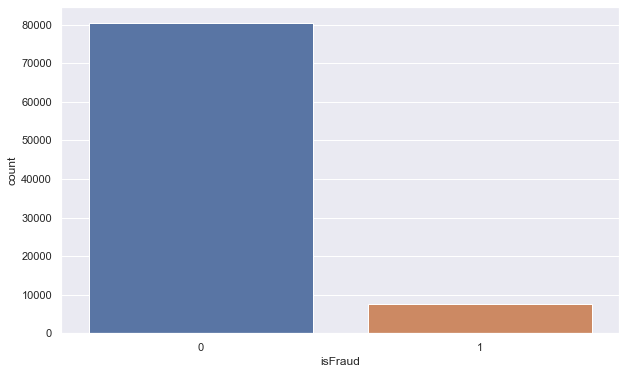

In [6]:
print(transaction_data['isFraud'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=transaction_data)
plt.show()

In [7]:
print(transaction_data['isFraud'].value_counts(normalize=True))

0    0.914771
1    0.085229
Name: isFraud, dtype: float64


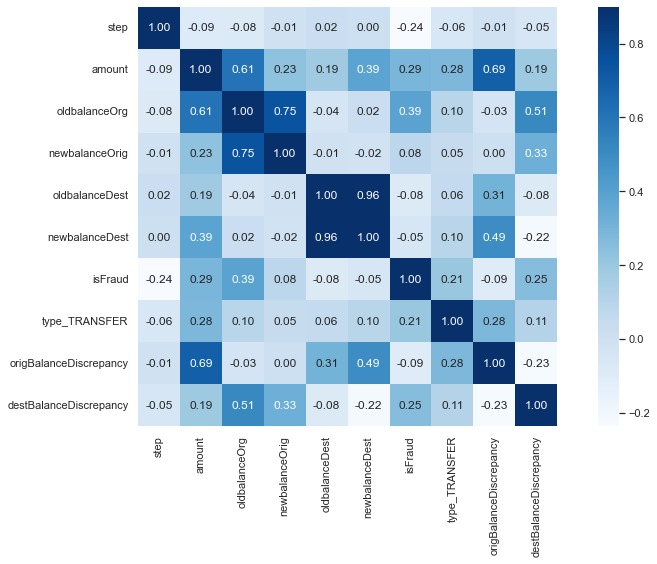

In [8]:
plt.figure(figsize=(12, 8))
corrmat = transaction_data.corr()
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='0.2f', cmap='Blues')
plt.tight_layout()  # Fits plot area to the plot, "tightly"
plt.show()  # Show the plot

In [9]:
# Setup variables
X = transaction_data.drop(['isFraud'], axis=1)
y = transaction_data['isFraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(61598, 9) (26400, 9)


In [11]:
# Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [12]:
# Bernoulli
from sklearn.naive_bayes import BernoulliNB
bern_clf = BernoulliNB()
bern_clf.fit(X_train_s, y_train)
y_pred_bern = bern_clf.predict(X_test_s)
print(y_pred_bern[:5])

[0 0 0 0 0]


In [13]:
# Bernoulli results
print('Bernoulli\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_bern))
print('Precision: ', precision_score(y_test, y_pred_bern))
print('Recall: ', recall_score(y_test, y_pred_bern))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_bern, average='weighted'))

Bernoulli

Accuracy:  0.9584469696969697
Precision:  0.8853545394300861
Recall:  0.5911504424778761
Avg F1-score: 0.9546


In [14]:
# Logistic Regression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_s, y_train)
y_pred_logistic = logistic_clf.predict(X_test_s)
print(y_pred_logistic[:5])

[0 0 0 0 0]


In [15]:
# LR results
print('Logistic Regression\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall: ', recall_score(y_test, y_pred_logistic))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_logistic, average='weighted'))

Logistic Regression

Accuracy:  0.970719696969697
Precision:  0.9270534175761057
Recall:  0.7141592920353982
Avg F1-score: 0.9690


In [16]:
# Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_s, y_train)
y_pred_gnb = gnb_clf.predict(X_test_s)
print(y_pred_gnb[:5])

[0 0 0 0 0]


In [17]:
# Naive Bayes results
print('Naive Bayes\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print('Precision: ', precision_score(y_test, y_pred_gnb))
print('Recall: ', recall_score(y_test, y_pred_gnb))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_gnb, average='weighted'))

Naive Bayes

Accuracy:  0.9390909090909091
Precision:  0.7235939643347051
Recall:  0.4668141592920354
Avg F1-score: 0.9330


In [18]:
# Random Forest
rf_clf = RandomForestClassifier(criterion='entropy',min_samples_split=3)
rf_clf.fit(X_train_s, y_train)
y_pred_rf = rf_clf.predict(X_test_s)
print(y_pred_rf[:5])

[0 0 0 0 0]


In [19]:
# RF results
print('Random Forest\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest

Accuracy:  0.9995454545454545
Precision:  0.9991119005328597
Recall:  0.995575221238938
Avg F1-score: 0.9995


In [20]:
# Decision Tree Classification
cart_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4) # optional--- criterion="entropy", max_depth=4
cart_clf.fit(X_train_s, y_train)
y_pred_cart = cart_clf.predict(X_test_s)
print(y_pred_cart[:5])

[0 0 0 0 0]


In [21]:
# Decision Tree results
print('Decision Tree\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_cart))
print('Precision: ', precision_score(y_test, y_pred_cart))
print('Recall: ', recall_score(y_test, y_pred_cart))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_cart, average='weighted'))

Decision Tree

Accuracy:  0.9995833333333334
Precision:  0.9995557529986673
Recall:  0.995575221238938
Avg F1-score: 0.9996


In [22]:
from sklearn.linear_model import SGDClassifier
# SGD
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd_clf.fit(X_train_s, y_train)
y_pred_sgd = sgd_clf.predict(X_test_s)
print(y_pred_sgd[:5])

[0 0 0 0 0]


In [23]:
# SGD results
print('SGD\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_sgd))
print('Precision: ', precision_score(y_test, y_pred_sgd))
print('Recall: ', recall_score(y_test, y_pred_sgd))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_sgd, average='weighted'))

SGD

Accuracy:  0.9697727272727272
Precision:  0.9294947121034077
Recall:  0.7
Avg F1-score: 0.9678


In [24]:
# XGBoost
xgboost_clf = XGBClassifier(max_depth=8)
xgboost_clf.fit(X_train_s, y_train)
y_pred_xgboost = xgboost_clf.predict(X_test_s)
print(y_pred_xgboost[:5])

[0 0 0 0 0]


In [25]:
# XGBoost results
print('XGBoost\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_xgboost))
print('Precision: ', precision_score(y_test, y_pred_xgboost))
print('Recall: ', recall_score(y_test, y_pred_xgboost))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_xgboost, average='weighted'))

XGBoost

Accuracy:  0.9995833333333334
Precision:  0.9995557529986673
Recall:  0.995575221238938
Avg F1-score: 0.9996


In [26]:
# KNN examination
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train_s, y_train)
    yhat = neigh.predict(X_test_s)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)

[0.98151515 0.98363636 0.98291667 0.98367424 0.98280303 0.98363636
 0.98344697 0.98333333 0.98280303]


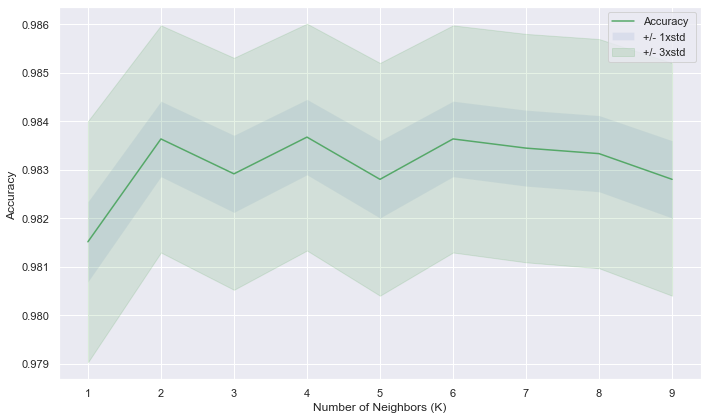

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.9836742424242424 with k = 4


In [29]:
# KNN
neigh_clf = KNeighborsClassifier(n_neighbors=4) # select k with highest accuracy above
neigh_clf.fit(X_train_s, y_train)
y_pred_neigh = neigh_clf.predict(X_test_s)
print(y_pred_neigh[:5])

[0 0 0 0 0]


In [30]:
# KNN results
print('KNN\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_neigh))
print('Precision: ', precision_score(y_test, y_pred_neigh))
print('Recall: ', recall_score(y_test, y_pred_neigh))
print("Avg F1-score: %.4f" % f1_score(y_test, y_pred_neigh, average='weighted'))

KNN

Accuracy:  0.9836742424242424
Precision:  0.9428571428571428
Recall:  0.8615044247787611
Avg F1-score: 0.9833


In [31]:
# Explore ROC. AUC for ROC curves for different algorithmns are obtained.

# LR
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
AUC_logistic = auc(fpr_logistic, tpr_logistic)
print('AUC for Logistic Regression :', AUC_logistic)

AUC for Logistic Regression : 0.8544491572024546


In [32]:
# Bernoulli
fpr_bern, tpr_bern, _ = roc_curve(y_test, y_pred_bern)
AUC_bern = auc(fpr_bern, tpr_bern)
print('AUC for Bernoulli Bayes :', AUC_bern)

AUC for Bernoulli Bayes : 0.7919919569473058


In [33]:
# NB
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
AUC_gnb = auc(fpr_gnb, tpr_gnb)
print('AUC for Naive Bayes :', AUC_gnb)

AUC for Naive Bayes : 0.7250599379724468


In [34]:
# RF 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
AUC_rf = auc(fpr_rf, tpr_rf)
print('AUC for Random Forest :', AUC_rf)

AUC for Random Forest : 0.9977461855987564


In [35]:
# Decision Tree
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_pred_cart)
AUC_cart = auc(fpr_cart, tpr_cart)
print('AUC for Decision Tree :', AUC_cart)

AUC for Decision Tree : 0.9977668981091127


In [36]:
# SGD
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
AUC_sgd = auc(fpr_sgd, tpr_sgd)
print('AUC for SGD :', AUC_sgd)

AUC for SGD : 0.8475144987572494


In [37]:
# XGBoost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_xgboost)
AUC_xgboost = auc(fpr_xgboost, tpr_xgboost)
print('AUC for XGBoost :', AUC_xgboost)

AUC for XGBoost : 0.9977668981091127


In [38]:
# KNN
fpr_neigh, tpr_neigh, _ = roc_curve(y_test, y_pred_neigh)
AUC_neigh = auc(fpr_neigh, tpr_neigh)
print('AUC for KNN :', AUC_neigh)

AUC for KNN : 0.9283081361673424


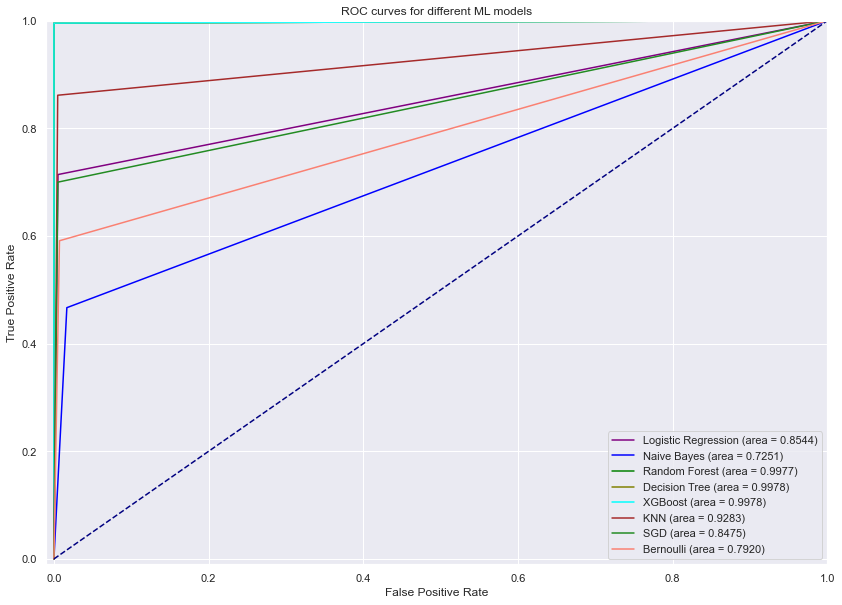

In [39]:
# ROC curves are drawn for different algorithms
plt.figure(figsize=(14, 10))

plt.plot(fpr_logistic, tpr_logistic, color='purple',
         label='Logistic Regression (area = %0.4f)' % AUC_logistic)

plt.plot(fpr_gnb, tpr_gnb, color='blue',
         label='Naive Bayes (area = %0.4f)' % AUC_gnb)

plt.plot(fpr_rf, tpr_rf, color='green',
         label='Random Forest (area = %0.4f)' % AUC_rf)

plt.plot(fpr_cart, tpr_cart, color='olive',
         label='Decision Tree (area = %0.4f)' % AUC_cart)

plt.plot(fpr_xgboost, tpr_xgboost, color='cyan',
         label='XGBoost (area = %0.4f)' % AUC_xgboost)

plt.plot(fpr_neigh, tpr_neigh, color='brown',
         label='KNN (area = %0.4f)' % AUC_neigh)

plt.plot(fpr_sgd, tpr_sgd, color='forestgreen',
         label='SGD (area = %0.4f)' % AUC_sgd)

plt.plot(fpr_bern, tpr_bern, color='salmon',
         label='Bernoulli (area = %0.4f)' % AUC_bern)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curves for different ML models')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Cross Validation scores
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(logistic_clf, X, y, cv=5)
nb_scores = cross_val_score(gnb_clf, X, y, cv=5)
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
dt_scores = cross_val_score(cart_clf, X, y, cv=5)
xgb_scores = cross_val_score(xgboost_clf, X, y, cv=5)
knn_scores = cross_val_score(neigh_clf, X, y, cv=5)
sgd_scores = cross_val_score(sgd_clf, X, y, cv=5)
bern_scores = cross_val_score(bern_clf, X, y, cv=5)

print("Logistic Regression %0.4f accuracy" % (lr_scores.mean()))
print("Naive Bayes %0.4f accuracy" % (nb_scores.mean()))
print("Random Forest %0.4f accuracy" % (rf_scores.mean()))
print("Decision Tree %0.4f accuracy" % (dt_scores.mean()))
print("XGBoost %0.4f accuracy" % (xgb_scores.mean()))
print("KNN %0.4f accuracy" % (knn_scores.mean()))
print("SGD %0.4f accuracy" % (sgd_scores.mean()))
print("Bernoulli %0.4f accuracy" % (bern_scores.mean()))

Logistic Regression 0.9690 accuracy
Naive Bayes 0.9395 accuracy
Random Forest 0.9996 accuracy
Decision Tree 0.9996 accuracy
XGBoost 0.9996 accuracy
KNN 0.9834 accuracy
SGD 0.9482 accuracy
Bernoulli 0.9676 accuracy


In [41]:
# Non-scaled models--top performing based on scaled CV
model1 = XGBClassifier(max_depth=8)
model1.fit(X_train, y_train)
score1 = model1.score(X_test, y_test)
print(score1)

0.9995833333333334


In [42]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=4) # optional--- criterion="entropy", max_depth=4
model2.fit(X_train, y_train)
score2 = model2.score(X_test, y_test)
print(score2)

0.9995454545454545


In [43]:
model3 = KNeighborsClassifier(n_neighbors=4)
model3.fit(X_train, y_train)
score3 = model3.score(X_test, y_test)
print(score3)

0.983219696969697


In [44]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [45]:
# y_test.info()
df = y_test.to_frame().reset_index()
print(df.head(3))
df2 = df.loc[df['isFraud'] == 1]
print(df2)

   index  isFraud
0  33147        0
1  70797        0
2  64645        0
       index  isFraud
26     86445        1
29     83772        1
44     84081        1
52     80940        1
76     81962        1
...      ...      ...
26379  84476        1
26380  80618        1
26385  81667        1
26389  82314        1
26397  84628        1

[2260 rows x 2 columns]


In [46]:
# Displays all observations that are targeted as likely fraud in the test set
print(df2.to_string())

       index  isFraud
26     86445        1
29     83772        1
44     84081        1
52     80940        1
76     81962        1
83     86387        1
94     84450        1
105    87732        1
122    85113        1
144    84018        1
149    85417        1
153    84522        1
176    87049        1
181    83042        1
182    81458        1
186    86292        1
191    83109        1
202    85685        1
295    81949        1
307    82151        1
313    86006        1
324    87747        1
347    85040        1
389    85628        1
391    83860        1
394    82538        1
413    85456        1
425    84057        1
440    85927        1
449    86374        1
450    84185        1
455    81954        1
467    83589        1
468    87332        1
471    87323        1
484    87754        1
506    87329        1
510    87430        1
533    86657        1
538    83374        1
542    81591        1
543    85853        1
551    83360        1
555    83381        1
558    858

In [47]:
# View the rule conditions based on the model by choosing an observation [iloc]--num_features can vary--pred probability 0: non-fraud, 1: fraud
# Observation 29 (from above) has nearly a 100% chance of being fraud
exp = explainer.explain_instance(
    data_row=X_test.iloc[29], 
    predict_fn=model1.predict_proba, num_features=5
)

exp.show_in_notebook(show_table=True)

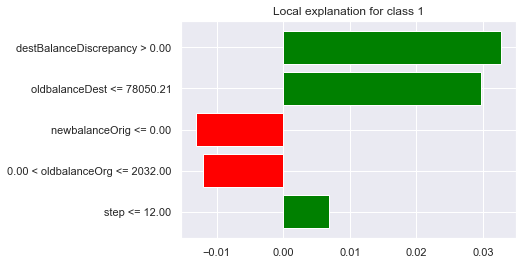

In [48]:
# Better view of the rule conditions
_ = exp.as_pyplot_figure()